#### We can test the power of our newly created algorithm by running it on a simple regression problem and comparing our results against those gotten from a linear regression model.

In [18]:
#importing the NN class from the neural model and also other modules like sklearn
from neural import NN
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics

We will be making use of the diabetes dataset present in sklearn.

In [3]:
#Loading dataset
diabetes= datasets.load_diabetes()
X = diabetes.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [4]:
X.shape

(442, 10)

In [7]:
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
y.shape

(442,)

Trying out the NN algorithm first. The class has two prominent methods; one that returns the weights, bias and mean_squared_error after each epoch of the gradient descent step and another method that plots the mean_squared_error against every iterative step specified as an argument. 

In [24]:
#Instantiating the NN class 
model_nn=NN(X,y)
#Using 100 iterations with a learn_rate of 0.001
weights,bias,mean_squared_error=model_nn.fit(100,0.001)
print(f'The weights are {weights}')
print()
print(f'The bias is {bias}')
print()
for i in range(len(mean_squared_error)):
    print(f'The mean squared error for {i} iteration is {mean_squared_error[i]}')


The weights are [ 0.10362787 -0.52926583 -0.46736163 -0.43400162 -0.92787722 -0.54676227
  0.94109261  0.44674296  0.22983002 -1.57597617]

The bias is [882.20216387]

The mean squared error for 0 iteration is 29031.072333137996
The mean squared error for 1 iteration is 28593.34601971344
The mean squared error for 2 iteration is 28045.178915493925
The mean squared error for 3 iteration is 27512.985052977245
The mean squared error for 4 iteration is 26996.467810070077
The mean squared error for 5 iteration is 26495.28592808634
The mean squared error for 6 iteration is 26009.10488985784
The mean squared error for 7 iteration is 25537.59679185842
The mean squared error for 8 iteration is 25080.44021870872
The mean squared error for 9 iteration is 24637.32012001748
The mean squared error for 10 iteration is 24207.92768951637
The mean squared error for 11 iteration is 23791.96024644602
The mean squared error for 12 iteration is 23389.12111915162
The mean squared error for 13 iteration is 22

Our results show a drop in mean_squared_error with every new iterative step taken but there also seems to be an increase after a while. To further explore this, we will visualize using the `plot_mse` method that takes in number of iterations and learn rate as arguments.

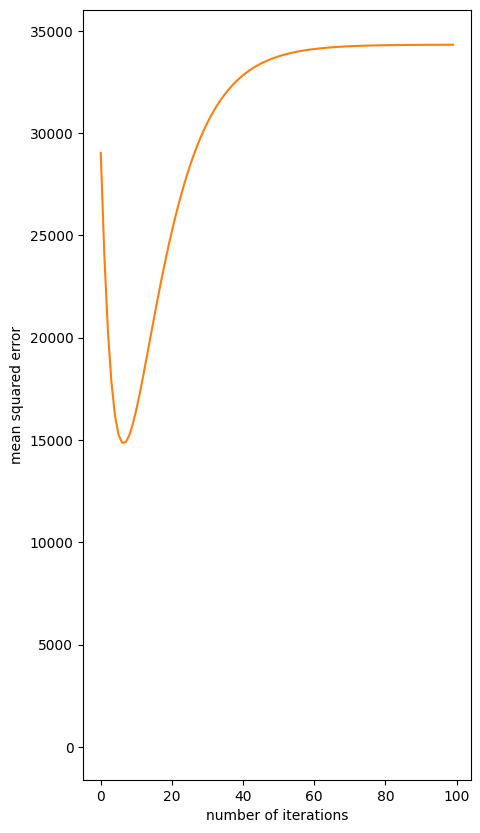

In [22]:
model_nn.plot_mse(100,0.01)

From our plot, there is an initial drastic drop in mean squared error creating a local minima value between 0 and 20 iterations after which the mean squared error value stabilizes. This is actually quite common in the training process and emphasizes the need to keep an eye out for changes as number iterations increases beacsuse the gradient descent algorithm seeks to pin point a global minima not a local minima.

After 100 iterations, we achieve an MSE of 16101, which is quite high but considering the shallowness of the neural network may be acceptable.

Next, we will try the linear regression class from sklearn

In [16]:
#Instantiating the class and fitting the model
model_lr=LinearRegression()
model_lr.fit(X,y)
y_pred=model_lr.predict(X)


In [19]:
print(metrics.mean_squared_error(y,y_pred))

2859.69634758675


Our linear regression model gives us an mse of 2859.69. A value slightly worse than that achieved by our NN model. This shows our NN model is a slightly better performer than a simple linear regression model. Although linear regression models are notorious for being underfitting an having a high bias, they are still a worthy opponent to know how well a newly created algorithm behaves.